# Made by: Abd-Elhamed Ebrahem

**This notebook is made on kaggle for GPU P100**

**In this notebook we will detect Potholes with YOLO11 nano version**

**The data is already available on roboflow, and I added some preprocessing and Augmentations for more edge cases detection**

**See the picture below**

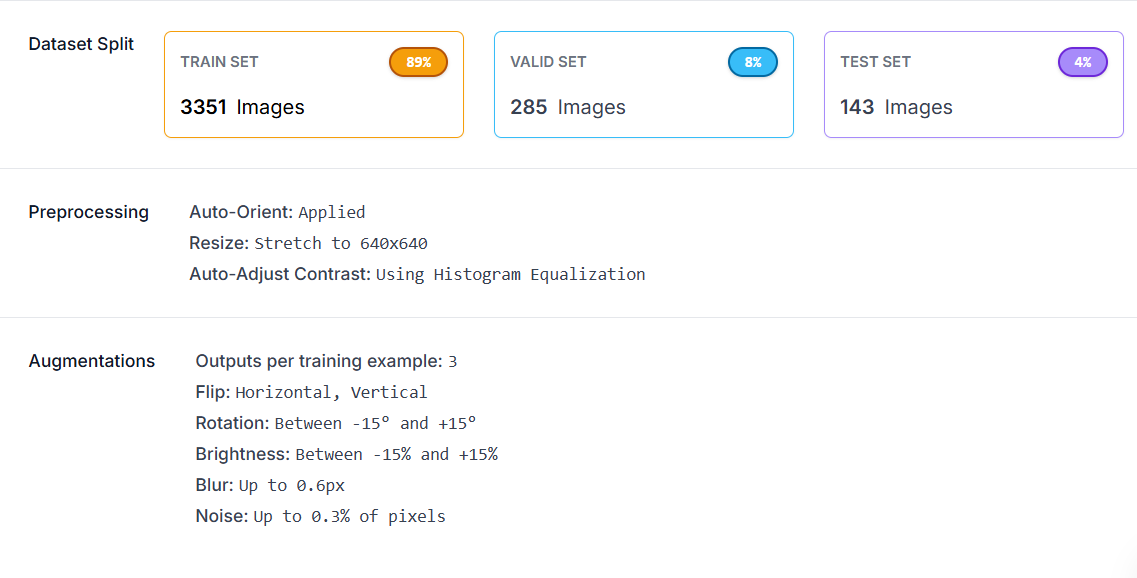

In [1]:
from PIL import Image

img = Image.open('data preprocessing.png')

img

### Import needed libraries and package installation

**These libraries have Pytorch as a requirement so make sure it is downloaded**

In [1]:
import torch
torch.__version__

'2.6.0+cu124'

In [2]:
!pip install ultralytics

In [3]:
!pip install roboflow

### Downloading data with roboflow

In [5]:
# Please feel free to ignore this, I'm just getting my api

with open('/kaggle/working/api.txt', 'r') as f:
    api = f.readline()

In [6]:
from roboflow import Roboflow

rf = Roboflow(api_key= api)
project = rf.workspace("haaaaaaaaaax").project("potholes-detect-uytky-1dabh")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [7]:
with open('/kaggle/working/potholes-detect-1/data.yaml', 'r') as f:
    data_yaml = f.readlines()

In [8]:
data_yaml

['train: ../train/images\n',
 'val: ../valid/images\n',
 'test: ../test/images\n',
 '\n',
 'nc: 74\n',
 "names: ['- -numpy-', '- -tqdm-', '- Citation', '- Description', '- Introduction', '- Requirements', '---DOI--https---zenodo.org-badge-186122711.svg---https---zenodo.org-badge-latestdoi-186122711-', '0', '13', '14', '15', '16', '17', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '38', '39', '40', '41', '42', '43', '44', '45', '46', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '67', '68', '69', '71', '72', '73', '74', '75', '76', '77', '79', 'Issues should be raised directly in the repository. For additional questions or comments please email Glenn Jocher at glenn.jocher-ultralytics.com or visit us at https---contact.ultralytics.com.', 'Potholes', 'Python 3.7 or later with the following -pip3 install -U -r requirements.txt- packages-', 'The https---github.com-ultralyt

**NOTE: if you want the class name to show in the predicted image we can add labels to yaml file but adding 79 classes manually is headache, especially we don't know the classes names, so i will just ignore it for now**

### YOLOv11n

In [9]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

In [10]:
# I will go for 50 epochs for first try, and if the model is still not functioning well I'll just train more
results = model.train(data="/kaggle/working/potholes-detect-1/data.yaml", epochs=50, imgsz=640)

Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/potholes-detect-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

train: Scanning /kaggle/working/potholes-detect-1/train/labels... 3351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3351/3351 [00:02<00:00, 1490.48it/s]


train: New cache created: /kaggle/working/potholes-detect-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 594.7±644.7 MB/s, size: 87.2 KB)


val: Scanning /kaggle/working/potholes-detect-1/valid/labels... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<00:00, 758.60it/s]

val: New cache created: /kaggle/working/potholes-detect-1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000128, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.58G       1.94      5.031      1.983         44        640: 100%|██████████| 210/210 [00:49<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.35it/s]

                   all        285       1135      0.789     0.0958      0.153     0.0647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.85G      1.806      3.658      1.851         54        640: 100%|██████████| 210/210 [00:46<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]


                   all        285       1135      0.204      0.328      0.222     0.0948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.86G      1.778      2.826      1.894         82        640: 100%|██████████| 210/210 [00:45<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]


                   all        285       1135      0.288      0.351      0.297      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.88G      1.713      2.553      1.857         39        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.00it/s]

                   all        285       1135      0.333      0.355      0.325      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.89G      1.667      2.425      1.811         67        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]

                   all        285       1135      0.369      0.437      0.369      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.91G      1.631      2.291      1.765         63        640: 100%|██████████| 210/210 [00:45<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]


                   all        285       1135      0.417      0.455      0.395       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.92G      1.602      2.217      1.739         61        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]

                   all        285       1135      0.442      0.482      0.417      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.94G      1.573      2.136       1.71         52        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]

                   all        285       1135      0.425      0.508      0.433      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.95G       1.56      2.074      1.709         37        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]


                   all        285       1135      0.507      0.465      0.467      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.97G      1.534      2.018      1.677         52        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]


                   all        285       1135      0.456      0.508      0.451      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.98G      1.518       1.98      1.654         53        640: 100%|██████████| 210/210 [00:45<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]

                   all        285       1135      0.428      0.567      0.456      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         3G      1.516      1.907      1.642         52        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]


                   all        285       1135      0.474      0.452      0.441      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.01G      1.484      1.876      1.627         58        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]


                   all        285       1135      0.463      0.469       0.43      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.03G      1.485      1.806      1.613         55        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]

                   all        285       1135      0.502      0.533      0.491      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.04G      1.485      1.788      1.606         43        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]


                   all        285       1135      0.558      0.519      0.508      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.06G      1.457      1.749      1.593         38        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]

                   all        285       1135      0.556      0.519      0.515      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.07G      1.462      1.742      1.595         18        640: 100%|██████████| 210/210 [00:45<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]

                   all        285       1135      0.533      0.515      0.517      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.09G      1.451      1.696      1.572         69        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]


                   all        285       1135       0.56      0.516      0.511      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       3.1G      1.455      1.658      1.576         45        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]


                   all        285       1135      0.544      0.542      0.534      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.12G      1.425      1.599      1.556         92        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]


                   all        285       1135      0.557      0.515      0.533      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.13G      1.415      1.604      1.552         39        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]

                   all        285       1135      0.541      0.522      0.508      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.15G      1.413      1.559      1.545         28        640: 100%|██████████| 210/210 [00:45<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]


                   all        285       1135      0.546      0.565      0.523       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.16G      1.408      1.547      1.536         52        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]


                   all        285       1135      0.587      0.586       0.56      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.18G        1.4      1.524      1.536         29        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]

                   all        285       1135      0.605       0.63      0.611      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.19G      1.378      1.479      1.522         37        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]

                   all        285       1135      0.622      0.583      0.568      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.21G      1.362      1.462      1.498         63        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]

                   all        285       1135      0.556      0.587      0.557      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.22G      1.374      1.484      1.514         48        640: 100%|██████████| 210/210 [00:45<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]

                   all        285       1135      0.612       0.58      0.583      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.24G      1.361      1.436      1.497         53        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]

                   all        285       1135       0.61      0.566       0.57      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.25G      1.353      1.425       1.49         73        640: 100%|██████████| 210/210 [00:45<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]


                   all        285       1135      0.586      0.587      0.569      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.27G      1.352      1.393      1.485         52        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]

                   all        285       1135      0.571      0.603      0.565      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.28G      1.341      1.372      1.482         58        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        285       1135      0.553      0.542      0.557      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.3G      1.314      1.358      1.462         52        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]

                   all        285       1135      0.522      0.579      0.554      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.31G      1.325      1.346       1.46         47        640: 100%|██████████| 210/210 [00:45<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]

                   all        285       1135      0.582      0.553      0.555      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.33G      1.309      1.345      1.453         43        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]

                   all        285       1135      0.573      0.618      0.586      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.34G      1.312       1.32       1.45         63        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.82it/s]


                   all        285       1135      0.582      0.652      0.582      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.36G      1.304      1.304      1.446         37        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.24it/s]

                   all        285       1135      0.593      0.602      0.587      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.37G      1.301      1.305      1.443         47        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.59it/s]

                   all        285       1135       0.62      0.654      0.609      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.38G       1.31      1.292      1.434         50        640: 100%|██████████| 210/210 [00:45<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]

                   all        285       1135      0.601      0.607      0.594      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.39G      1.304      1.268      1.441         74        640: 100%|██████████| 210/210 [00:45<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.51it/s]

                   all        285       1135       0.59      0.612       0.59      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.42G      1.285      1.275       1.43         36        640: 100%|██████████| 210/210 [00:45<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]

                   all        285       1135      0.606      0.598      0.575      0.319


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.43G      1.339      1.283      1.494         36        640: 100%|██████████| 210/210 [00:46<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.82it/s]


                   all        285       1135      0.606       0.57      0.576      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.45G      1.288      1.204      1.456         32        640: 100%|██████████| 210/210 [00:45<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]


                   all        285       1135      0.572      0.611       0.58       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.46G      1.261      1.156      1.434         11        640: 100%|██████████| 210/210 [00:45<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.29it/s]


                   all        285       1135      0.546      0.642      0.591       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.48G      1.265      1.151      1.438         18        640: 100%|██████████| 210/210 [00:45<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]

                   all        285       1135      0.623       0.58      0.582      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.49G      1.255      1.139      1.422         35        640: 100%|██████████| 210/210 [00:45<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.64it/s]

                   all        285       1135      0.623      0.554      0.596      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.51G      1.237      1.124      1.419         48        640: 100%|██████████| 210/210 [00:45<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]


                   all        285       1135      0.654      0.581      0.589      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.52G      1.231      1.118      1.412         30        640: 100%|██████████| 210/210 [00:45<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]

                   all        285       1135      0.628       0.58      0.585      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.54G      1.228      1.115      1.412         34        640: 100%|██████████| 210/210 [00:45<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]

                   all        285       1135      0.597      0.575      0.591      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.54G      1.222      1.106      1.407         40        640: 100%|██████████| 210/210 [00:45<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]


                   all        285       1135      0.642      0.589      0.595       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.57G      1.224      1.092        1.4         18        640: 100%|██████████| 210/210 [00:45<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]

                   all        285       1135      0.613      0.573      0.587      0.329



50 epochs completed in 0.665 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,607,782 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]


                   all        285       1135      0.643      0.588      0.595      0.331
                     0        260       1028      0.845      0.821      0.889      0.542
              Potholes         25        107      0.441      0.355      0.302      0.119


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train2


**We can see that the box accuracy remained almost the same for the last 10 epochs, so i think this is what YOLO11 nano can do. There is no need to train more**

### Evaluation

**We don't need to acctually evaluate the model ourselves.**

**Every thing we need is in the runs folder**

In [12]:
# Results.csv file

import pandas as pd

results_csv = pd.read_csv('/kaggle/working/runs/detect/train2/results.csv')

results_csv

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,51.8004,1.93967,5.03128,1.98255,0.78950,0.09582,0.15325,0.06469,1.93655,3.51707,1.98021,0.000042,0.000042,0.000042
1,2,100.2850,1.80589,3.65769,1.85116,0.20439,0.32836,0.22190,0.09476,1.94263,2.35899,2.12201,0.000083,0.000083,0.000083
2,3,148.2960,1.77764,2.82599,1.89370,0.28817,0.35149,0.29725,0.13534,1.84512,1.81613,2.01982,0.000123,0.000123,0.000123
3,4,196.0550,1.71318,2.55282,1.85678,0.33342,0.35501,0.32523,0.13603,1.86761,1.79719,2.11500,0.000120,0.000120,0.000120
4,5,243.8880,1.66651,2.42547,1.81081,0.36902,0.43697,0.36921,0.16583,1.77953,1.62519,1.97025,0.000118,0.000118,0.000118
5,6,291.5970,1.63089,2.29107,1.76506,0.41693,0.45482,0.39456,0.18988,1.74411,1.58280,1.90513,0.000115,0.000115,0.000115
6,7,339.4170,1.60247,2.21747,1.73943,0.44163,0.48243,0.41663,0.19836,1.73924,1.53808,1.87978,0.000113,0.000113,0.000113
7,8,387.2110,1.57346,2.13586,1.70954,0.42549,0.50822,0.43317,0.21425,1.69470,1.46764,1.86536,0.000110,0.000110,0.000110
8,9,435.0000,1.56034,2.07447,1.70900,0.50709,0.46473,0.46702,0.21481,1.70768,1.47731,1.84941,0.000108,0.000108,0.000108
9,10,482.7190,1.53398,2.01789,1.67743,0.45635,0.50800,0.45098,0.22095,1.65981,1.43920,1.80520,0.000105,0.000105,0.000105


In [13]:
results_csv.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,2204.72,1.23693,1.12374,1.41949,0.65368,0.58147,0.58865,0.32521,1.42624,0.96020,1.52762,0.000014,0.000014,0.000014
46,47,2252.21,1.23123,1.11839,1.41182,0.62766,0.57970,0.58509,0.32298,1.43615,0.96363,1.53585,0.000011,0.000011,0.000011
47,48,2299.63,1.22818,1.11471,1.41218,0.59720,0.57473,0.59073,0.32839,1.42142,0.95440,1.52631,0.000009,0.000009,0.000009
48,49,2347.06,1.22162,1.10624,1.40687,0.64236,0.58856,0.59461,0.33042,1.42652,0.95869,1.52581,0.000006,0.000006,0.000006
49,50,2394.48,1.22378,1.09169,1.40006,0.61340,0.57279,0.58737,0.32919,1.42950,0.95597,1.53248,0.000004,0.000004,0.000004


**The results are not the best, but I think this is what YOLOv11 nano can do**

In [14]:
from PIL import Image

In [16]:
img = Image.open('/kaggle/working/runs/detect/train2/results.png')

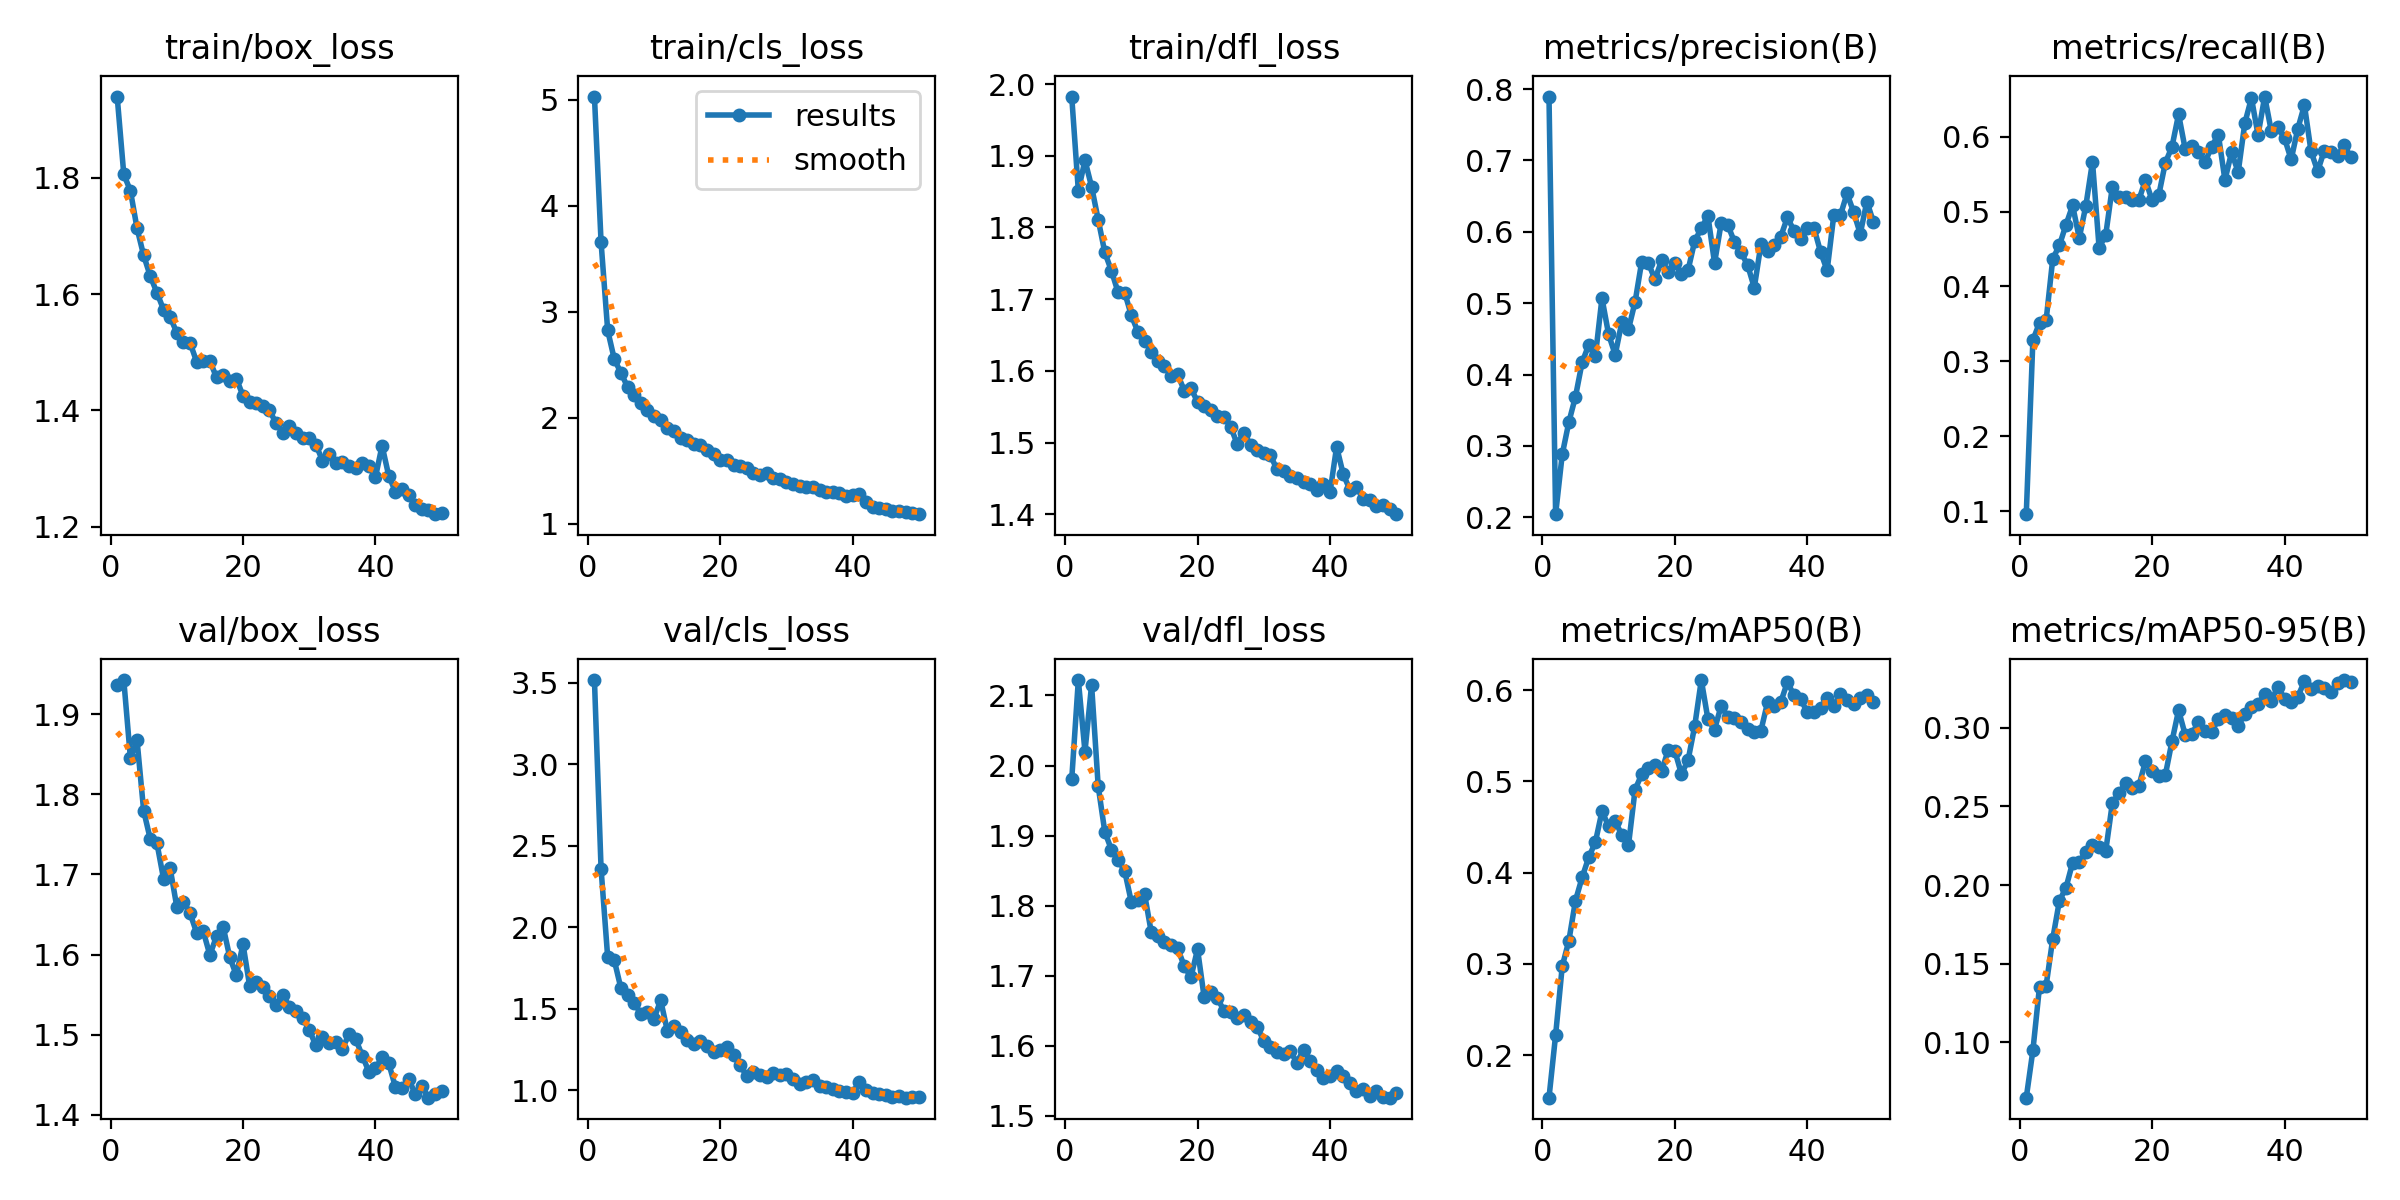

In [17]:
img

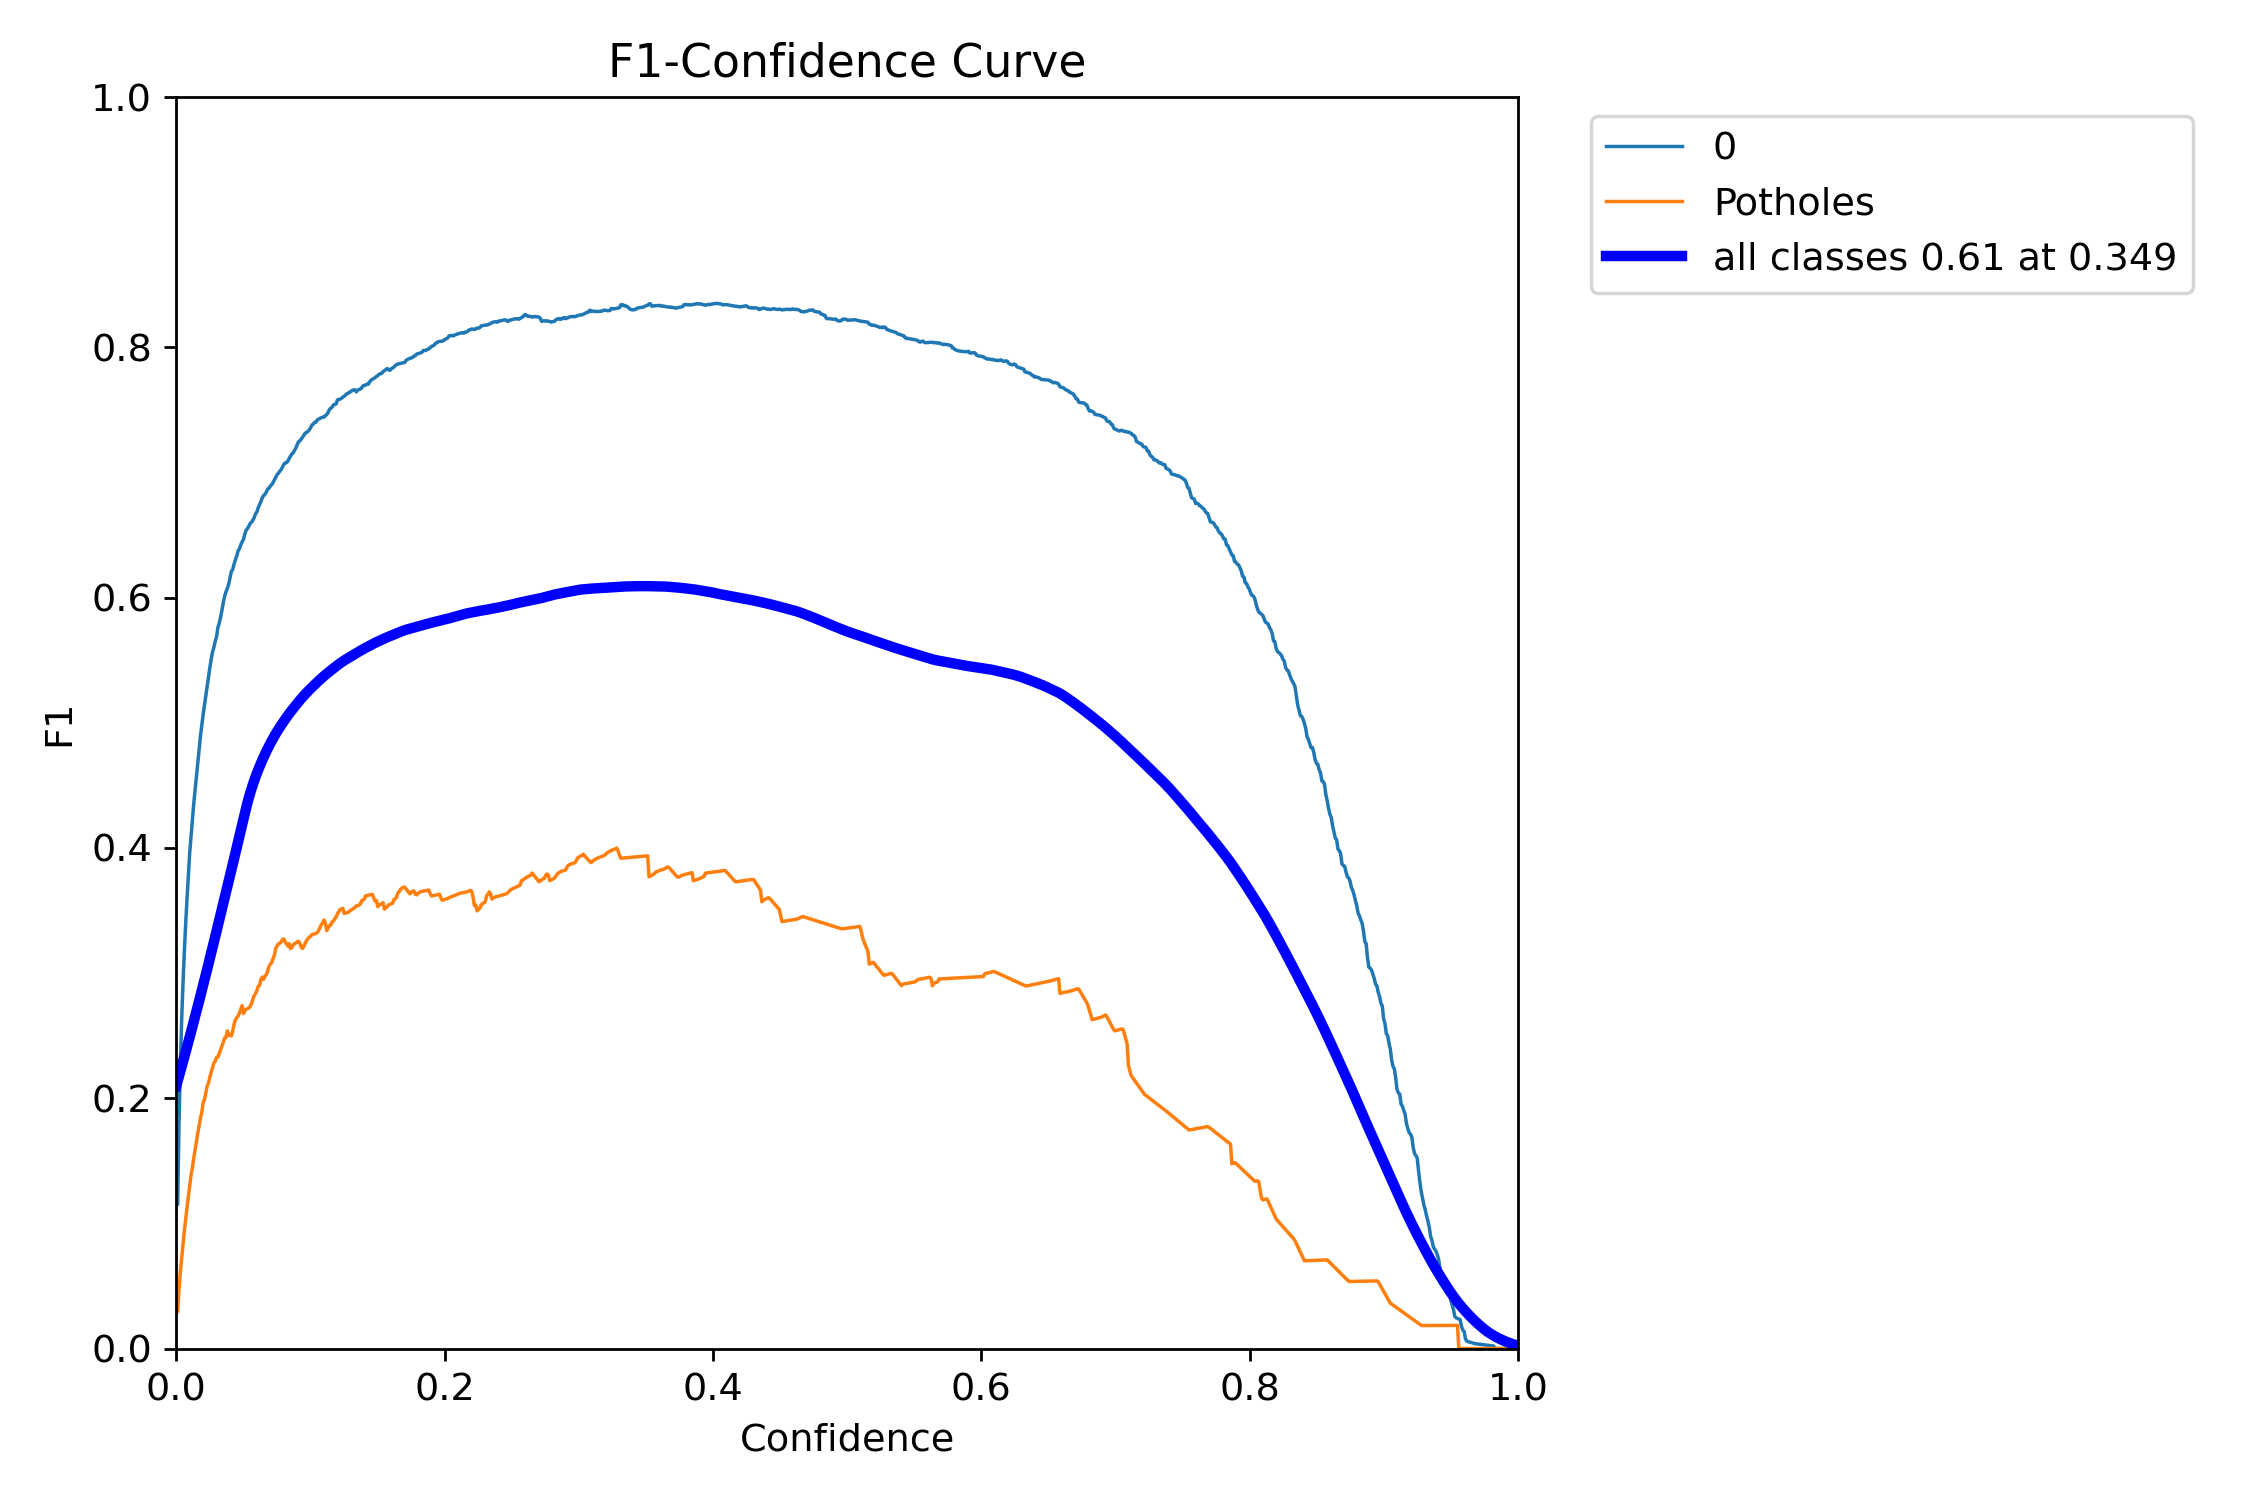

In [18]:
# F1-curve

f1 = Image.open('/kaggle/working/runs/detect/train2/F1_curve.png')
f1

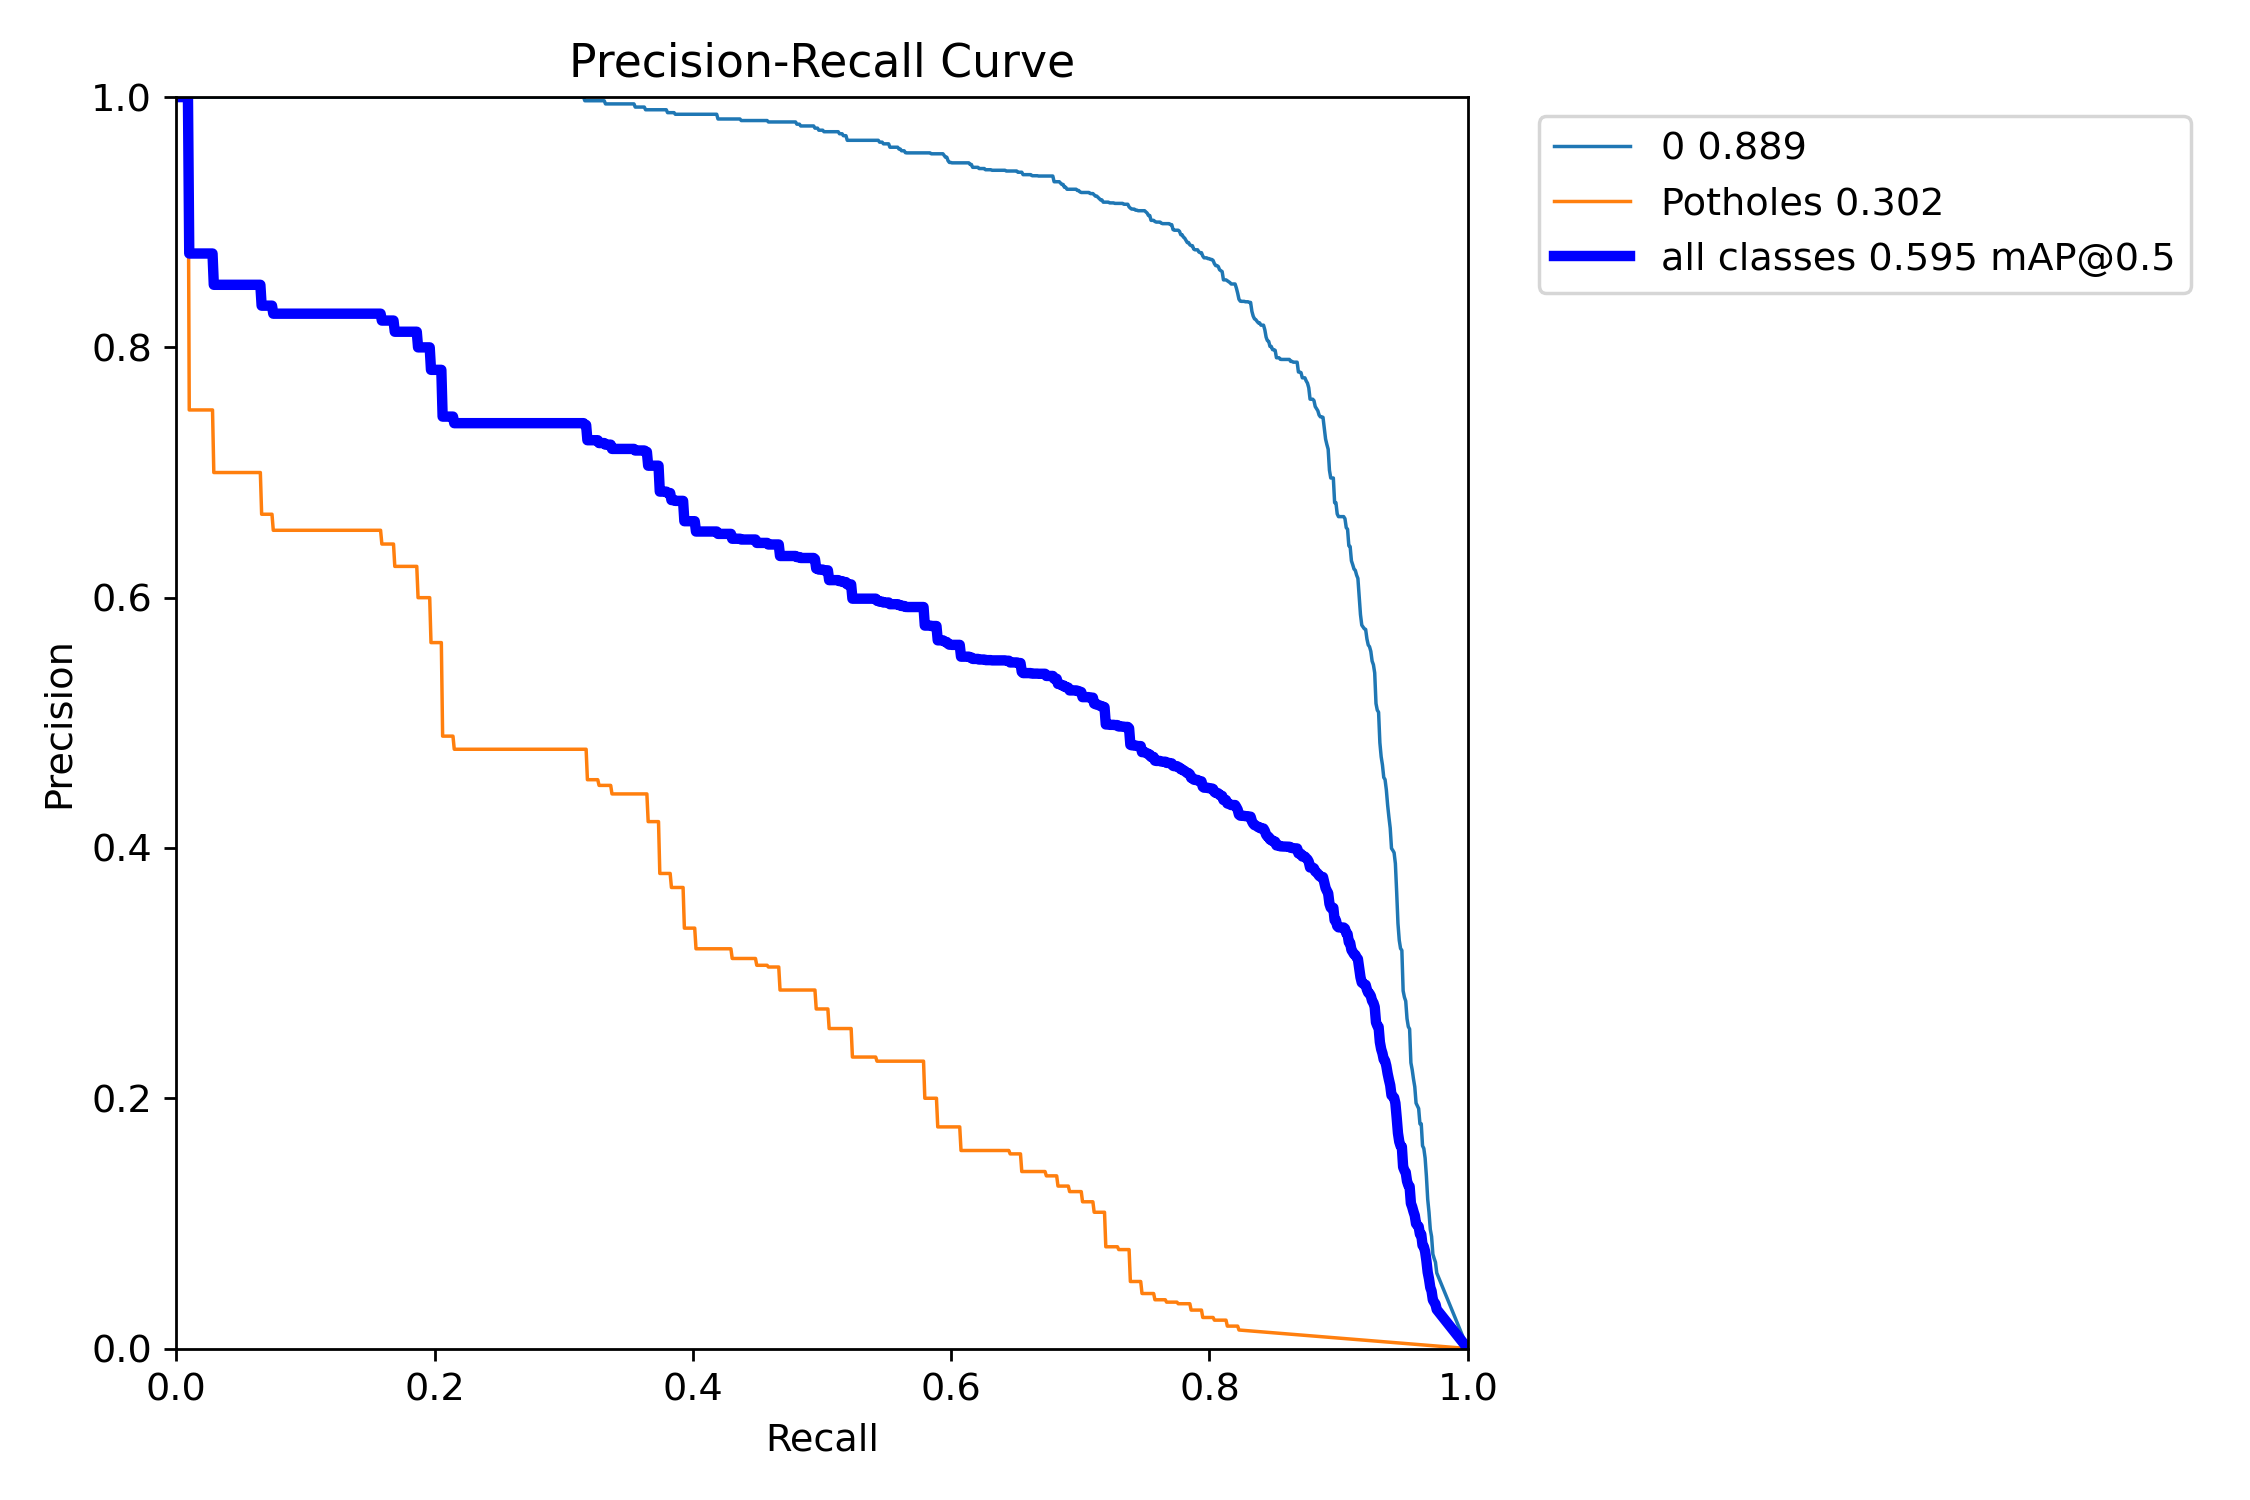

In [19]:
# Percision-Recall_curve

PR_curve = Image.open('/kaggle/working/runs/detect/train2/PR_curve.png')
PR_curve

**I can't print the confusion_matrix because we have 79 classes**

### Inference


image 1/1 /kaggle/working/potholes-detect-1/test/images/106_jpg.rf.4c97ae1a3ec4d5266ad30cb41bde1541.jpg: 640x640 10 0s, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


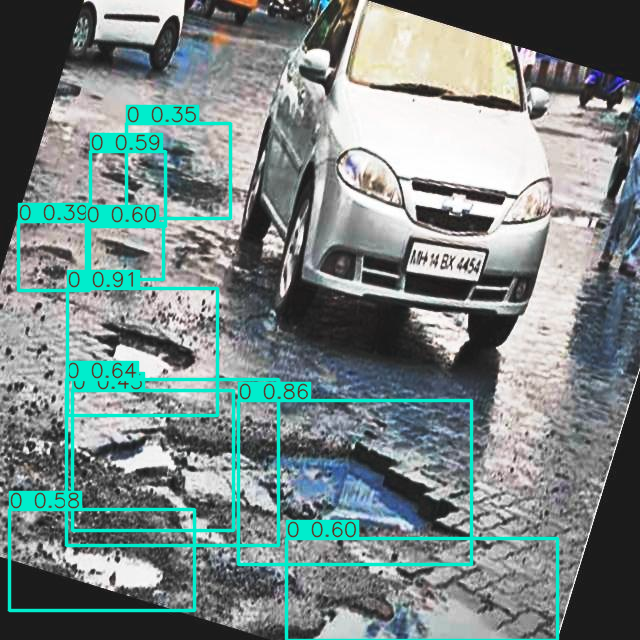

In [20]:
from ultralytics import YOLO
from PIL import Image

pred_model = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')

res_image = pred_model.predict('/kaggle/working/potholes-detect-1/test/images/106_jpg.rf.4c97ae1a3ec4d5266ad30cb41bde1541.jpg')

res_image = res_image[0]

img = res_image.plot()

pil_image = Image.fromarray(img)

pil_image

**Please feel free to ignore this section i will zip the folder to download on my computer**

In [21]:
!zip -r runs.zip /kaggle/working/runs

  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/results.png (deflated 8%)
  adding: kaggle/working/runs/detect/train2/val_batch2_labels.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/train2/P_curve.png (deflated 10%)
  adding: kaggle/working/runs/detect/train2/F1_curve.png (deflated 12%)
  adding: kaggle/working/runs/detect/train2/confusion_matrix_normalized.png (deflated 23%)
  adding: kaggle/working/runs/detect/train2/train_batch8400.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/train2/val_batch1_labels.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/train2/PR_curve.png (deflated 13%)
  adding: kaggle/working/runs/detect/train2/train_batch8402.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/train2/train_batch1.jpg (deflated 2%)
  adding: kaggle/working/runs/detect/train2/train_batch8401.jpg (deflated 2%)
  add